In [45]:
#import them libs
%pylab inline --no-import-all
import yfinance as yf
import alphalens
import pandas as pd
import numpy as np
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pytz
from pytz import timezone
import warnings

yf.pdr_override()
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [46]:
#Function to load back in the optimal MACD dictionary from pickle file
def load_dict(file_name):
    pickle_in = open(file_name,"rb")
    MACD_dict = pickle.load(pickle_in)
    return MACD_dict

In [47]:
#call the function
MACD_dict = load_dict('save.p')
tickers = list(MACD_dict.keys())

In [48]:
#Function to get stock data from yahoo, using the pickle file of tickers
def get_data_from_yahoo(reload_sp500=False):

    if reload_sp500:
        tickers=save_sp500_tickers()
    else:
        with open("sp500tickers.pickle","rb") as f:
            tickers=pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    start = dt.datetime(2020,1,1)
    end = dt.datetime(2020,12,31)
    
    for ticker in tickers:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker,start,end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

In [6]:
get_data_from_yahoo()

MMM
[*********************100%***********************]  1 of 1 completed
ABT
[*********************100%***********************]  1 of 1 completed
ABBV
[*********************100%***********************]  1 of 1 completed
ABMD
[*********************100%***********************]  1 of 1 completed
ACN
[*********************100%***********************]  1 of 1 completed
ATVI
[*********************100%***********************]  1 of 1 completed
ADBE
[*********************100%***********************]  1 of 1 completed
AMD
[*********************100%***********************]  1 of 1 completed
AAP
[*********************100%***********************]  1 of 1 completed
AES
[*********************100%***********************]  1 of 1 completed
AFL
[*********************100%***********************]  1 of 1 completed
A
[*********************100%***********************]  1 of 1 completed
APD
[*********************100%***********************]  1 of 1 completed
AKAM
[*********************100%******************

[*********************100%***********************]  1 of 1 completed
CTXS
[*********************100%***********************]  1 of 1 completed
CLX
[*********************100%***********************]  1 of 1 completed
CME
[*********************100%***********************]  1 of 1 completed
CMS
[*********************100%***********************]  1 of 1 completed
KO
[*********************100%***********************]  1 of 1 completed
CTSH
[*********************100%***********************]  1 of 1 completed
CL
[*********************100%***********************]  1 of 1 completed
CMCSA
[*********************100%***********************]  1 of 1 completed
CMA
[*********************100%***********************]  1 of 1 completed
CAG
[*********************100%***********************]  1 of 1 completed
CXO
[*********************100%***********************]  1 of 1 completed
COP
[*********************100%***********************]  1 of 1 completed
ED
[*********************100%***********************]

[*********************100%***********************]  1 of 1 completed
HAS
[*********************100%***********************]  1 of 1 completed
HCA
[*********************100%***********************]  1 of 1 completed
PEAK
[*********************100%***********************]  1 of 1 completed
HSIC
[*********************100%***********************]  1 of 1 completed
HSY
[*********************100%***********************]  1 of 1 completed
HES
[*********************100%***********************]  1 of 1 completed
HPE
[*********************100%***********************]  1 of 1 completed
HLT
[*********************100%***********************]  1 of 1 completed
HFC
[*********************100%***********************]  1 of 1 completed
HOLX
[*********************100%***********************]  1 of 1 completed
HD
[*********************100%***********************]  1 of 1 completed
HON
[*********************100%***********************]  1 of 1 completed
HRL
[*********************100%***********************

[*********************100%***********************]  1 of 1 completed
NWS
[*********************100%***********************]  1 of 1 completed
NEE
[*********************100%***********************]  1 of 1 completed
NLSN
[*********************100%***********************]  1 of 1 completed
NKE
[*********************100%***********************]  1 of 1 completed
NI
[*********************100%***********************]  1 of 1 completed
NSC
[*********************100%***********************]  1 of 1 completed
NTRS
[*********************100%***********************]  1 of 1 completed
NOC
[*********************100%***********************]  1 of 1 completed
NLOK
[*********************100%***********************]  1 of 1 completed
NCLH
[*********************100%***********************]  1 of 1 completed
NOV
[*********************100%***********************]  1 of 1 completed
NRG
[*********************100%***********************]  1 of 1 completed
NUE
[*********************100%**********************

[*********************100%***********************]  1 of 1 completed
TRV
[*********************100%***********************]  1 of 1 completed
TFC
[*********************100%***********************]  1 of 1 completed
TWTR
[*********************100%***********************]  1 of 1 completed
TYL
[*********************100%***********************]  1 of 1 completed
TSN
[*********************100%***********************]  1 of 1 completed
UDR
[*********************100%***********************]  1 of 1 completed
ULTA
[*********************100%***********************]  1 of 1 completed
USB
[*********************100%***********************]  1 of 1 completed
UAA
[*********************100%***********************]  1 of 1 completed
UA
[*********************100%***********************]  1 of 1 completed
UNP
[*********************100%***********************]  1 of 1 completed
UAL
[*********************100%***********************]  1 of 1 completed
UNH
[*********************100%***********************]

In [90]:
#Function to add EMA to datafram for a given period
def add_EMA(df,period):
    column_name = 'EMA_' + str(period)
    df[column_name] = df['Close'].ewm(span=int(period),min_periods=0,adjust=False,ignore_na=False).mean().shift(0)
    df.dropna(inplace=True)
    return df

#Function to add a few MACD related indicators and a combined predictive signal
def add_MACD(df,ticker_name,MACD_dict):
    
    short_period = MACD_dict[ticker_name][0][0]
    long_period = MACD_dict[ticker_name][0][1]
    signal_period = MACD_dict[ticker_name][0][2]
    
    df = add_EMA(df,short_period)
    df = add_EMA(df,long_period)
    
    short_name = 'EMA_' + str(short_period)
    long_name = 'EMA_' + str(long_period)
    
    df['MACD'] = df[long_name]-df[short_name]
    
    df['MACD_signal'] = df['MACD'].ewm(span=int(signal_period),min_periods=0,adjust=False,ignore_na=False).mean()
    
    df['MACD-Signal']=df['MACD_signal']-df['MACD']
    df['MACD-Signal'] = ((df['MACD-Signal']) / 
                         (df['MACD-Signal'].max(axis=0) - df['MACD-Signal'].min(axis=0)))
    
    df['MACD-Signal-diff'] =  df['MACD-Signal'].diff(periods=1)
        
    df['MACD-norm'] = ((df['MACD']) / 
                         (df['MACD'].max(axis=0) - df['MACD'].min(axis=0)))
    
    df['predictive_signal']= 0.25*df['MACD-Signal-diff'] - 0.5*df['MACD-Signal'] + 0.25*df['MACD-norm']
    #df['predictive_signal']=np.random.randint(0, 10)
    #df.drop([short_name, long_name], axis='columns', inplace=True)
    
    return df

In [91]:
#Function to load the ticker data and calculate the predictive signal using the optimal MACD parameters
def compile_data():

    with open("sp500tickers.pickle","rb") as f:
        tickers = pickle.load(f)
    main_df = pd.DataFrame()
    
    MACD_dict = load_dict('save.p')
    
    appended_data = []
    ticker_names = []
    
    for count,ticker in enumerate(tickers):
        try:
            df=pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', drop = False, inplace = True)
            #df.set_index(pd.DatetimeIndex(df['Date']),inplace=True)

            if df.isnull().values.any():
                print(ticker)
                continue

            df = add_MACD(df,ticker,MACD_dict)

            appended_data.append(df)
            ticker_names.append(ticker)
        except KeyError: continue
        

    main_df = pd.concat(appended_data,axis=1, keys=tickers)
    main_df.to_csv('sp500_joined.csv')
    return main_df

In [92]:
df = compile_data()

APD
CAH
EQR
ESS
FRT
KIM
PWR
RJF
O
RSG
SLG
STT
VTR


In [93]:
df.head()

MMM                                                  \
                 Date        Open        High         Low       Close   
Date                                                                    
2020-01-02 2020-01-02  177.679993  180.009995  177.139999  180.000000   
2020-01-03 2020-01-03  177.020004  178.660004  175.630005  178.449997   
2020-01-06 2020-01-06  177.149994  178.710007  176.350006  178.619995   
2020-01-07 2020-01-07  178.279999  178.509995  176.820007  177.899994   
2020-01-08 2020-01-08  178.000000  181.500000  177.649994  180.630005   

                                                                   ...  \
             Adj Close   Volume       EMA_3       EMA_7      MACD  ...   
Date                                                               ...   
2020-01-02  173.538239  3601700  180.000000  180.000000  0.000000  ...   
2020-01-03  172.043884  2466900  179.224998  179.612499  0.387501  ...   
2020-01-06  172.207794  1998000  178.922497  179.364373  0.441876  ...   
2020-01-07  171.513626  2173000  178.411245  178.998278  0.587033  ...   
2020-01-08  174.145645  2758300  179.520625  179.406210 -0.114415  ...   

                   WFC                                                         \
             Adj Close   Volume       EMA_4       EMA_7      MACD MACD_signal   
Date                                                                            
2020-01-02  133.169510  1576700  134.139999  134.139999  0.000000    0.000000   
2020-01-03  133.189362  1274000  134.148001  134.145000 -0.003001   -0.001500   
2020-01-06  132.166824  2334100  133.740803  133.891252  0.150449    0.074474   
2020-01-07  132.613556  1224500  133.676482  133.813439  0.136957    0.105716   
2020-01-08  132.325638  1766700  133.521887  133.682578  0.160691    0.133203   

                                                                     
           MACD-Signal MACD-Signal-diff MACD-norm predictive_signal  
Date                                                                 
2020-01-02    0.000000              NaN  0.000000               NaN  
2020-01-03    0.000469         0.000469 -0.000353         -0.000205  
2020-01-06   -0.023759        -0.024228  0.017680          0.010242  
2020-01-07   -0.009770         0.013989  0.016094          0.012406  
2020-01-08   -0.008596         0.001174  0.018883          0.009312  

[5 rows x 7290 columns]

In [94]:
#Extract pricing data for each stock from big df
pricing = df.xs('Open',level=1,axis=1).shift(-1)
pricing.tail()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-23,174.419998,107.440002,103.110001,304.450012,258.000000,90.300003,499.160004,91.800003,159.860001,23.500000,...,114.410004,64.379997,22.910000,143.139999,100.309998,107.220001,382.279999,149.399994,43.619999,159.919998
2020-12-24,175.309998,108.959999,103.650002,307.339996,259.730011,91.760002,505.609985,92.930000,161.309998,23.480000,...,114.959999,64.879997,22.809999,144.080002,101.440002,108.489998,380.470001,150.610001,43.660000,161.440002
2020-12-28,175.550003,108.500000,103.949997,314.250000,260.890015,91.629997,501.170013,91.660004,159.130005,23.379999,...,116.279999,65.500000,23.350000,141.949997,101.180000,109.629997,384.690002,150.429993,43.389999,163.210007
2020-12-29,173.880005,108.690002,105.110001,324.589996,258.670013,91.750000,503.049988,90.779999,156.639999,22.980000,...,114.180000,65.519997,22.660000,140.279999,99.949997,109.349998,380.690002,152.850006,42.770000,163.509995
2020-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#Extract the predictive signal from the big data frame for each stock and stack (required by alphalens..)
predictive_factor = df.xs('predictive_signal',level=1,axis=1)
predictive_factor = predictive_factor.stack()
predictive_factor.index = predictive_factor.index.set_names(['date', 'asset'])
predictive_factor.head()


date        asset
2020-01-03  MMM      0.021396
            ABT      0.018772
            ABBV     0.012795
            ABMD     0.013445
            ACN      0.003761
dtype: float64

In [96]:
#Call the handy function that alphalens provides for cleaning up the data.
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(predictive_factor, 
                                                                   pricing, 
                                                                   quantiles=5,
                                                                   bins=None,
                                                                   periods=(1,3,5))

Dropped 2.0% entries from factor data: 2.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.506333,0.165548,-0.092983,0.072454,24108,20.164609
2,-0.265035,0.213183,-0.032545,0.059212,23862,19.958848
3,-0.192170,0.251164,-0.001337,0.059925,23862,19.958848
4,-0.131753,0.296867,0.029201,0.063798,23862,19.958848
5,-0.091366,0.513911,0.086558,0.081485,23862,19.958848


Returns Analysis


,1D,3D,5D
Ann. alpha,0.362,0.273,0.148
beta,0.096,0.121,0.172
Mean Period Wise Return Top Quantile (bps),12.009,10.105,5.881
Mean Period Wise Return Bottom Quantile (bps),-17.427,-14.211,-10.146
Mean Period Wise Spread (bps),29.436,24.371,16.120


<Figure size 432x288 with 0 Axes>

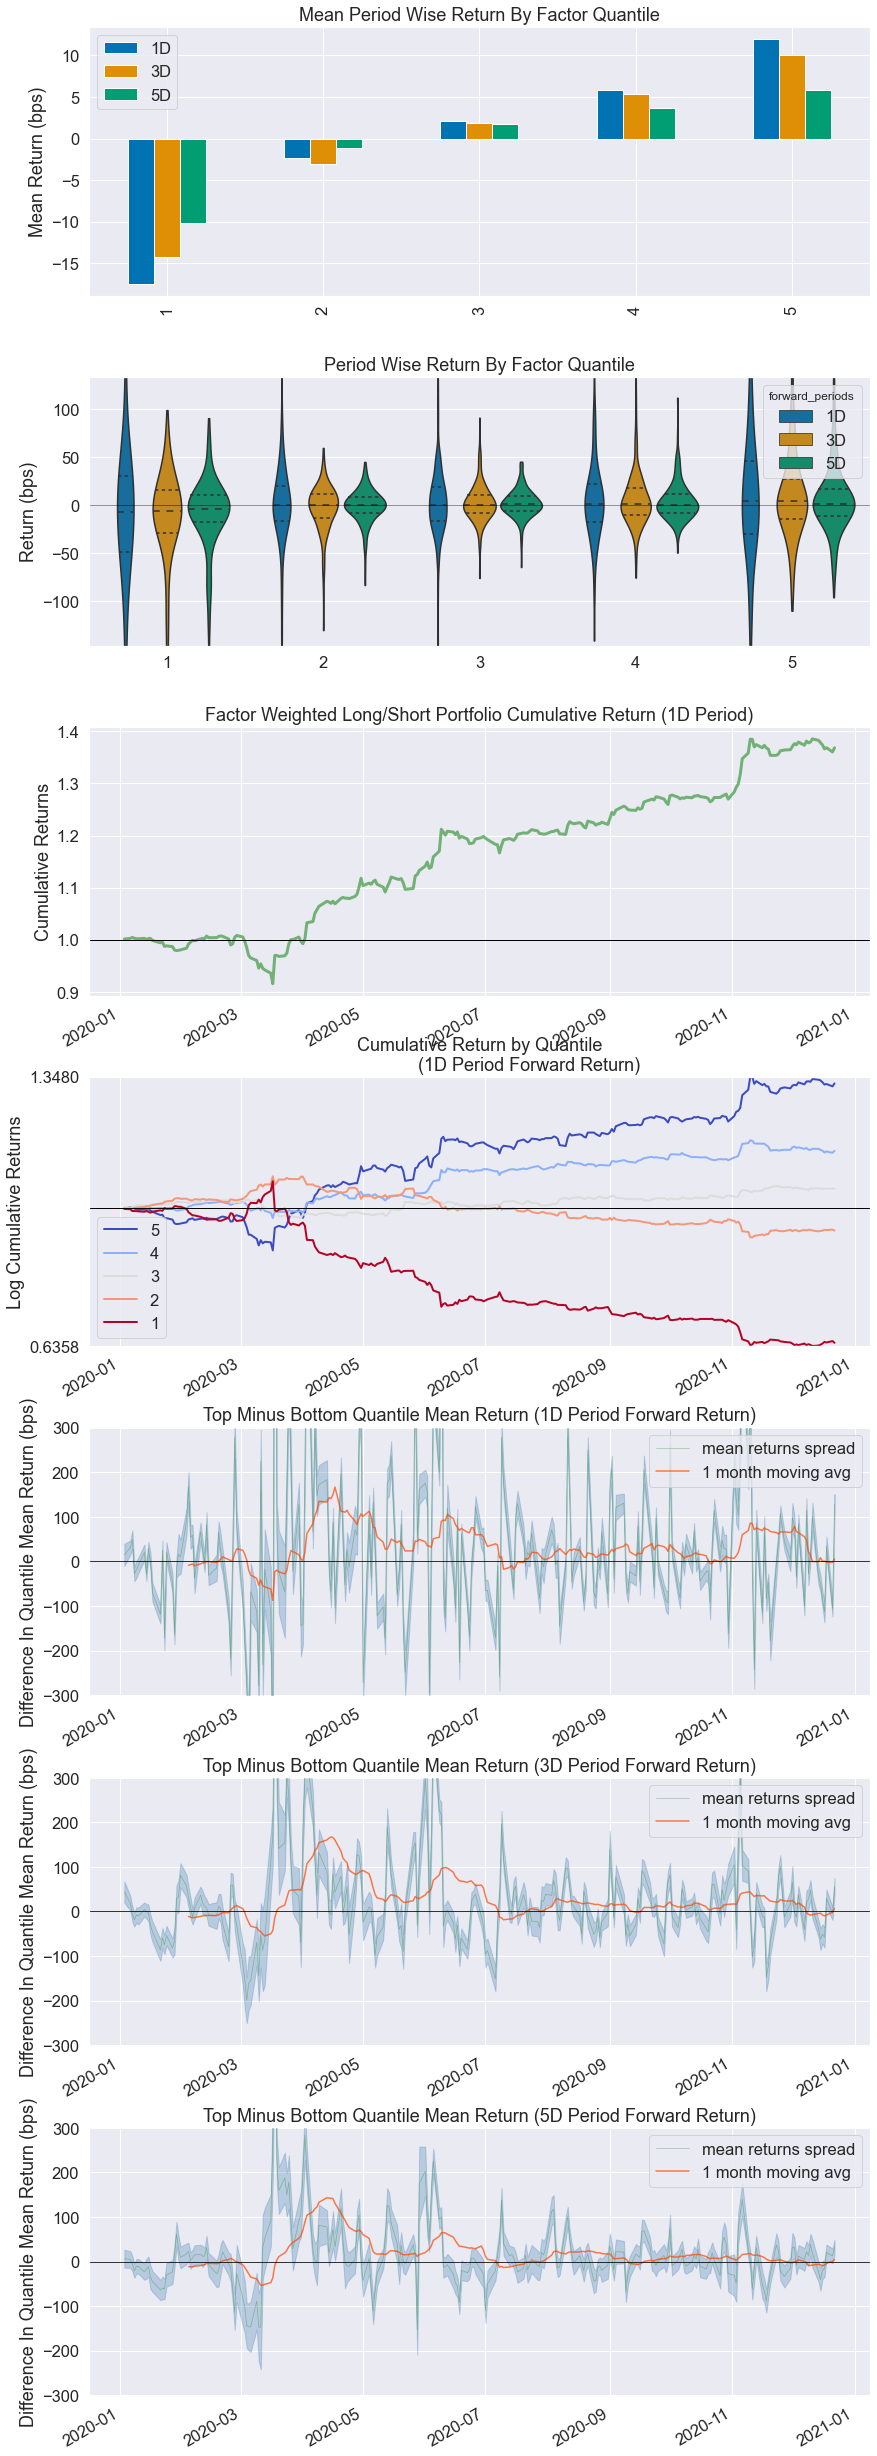

Information Analysis


,1D,3D,5D
IC Mean,0.028,0.043,0.037
IC Std.,0.202,0.212,0.203
Risk-Adjusted IC,0.136,0.203,0.183
t-stat(IC),2.139,3.178,2.866
p-value(IC),0.033,0.002,0.005
IC Skew,0.389,0.308,0.426
IC Kurtosis,0.193,-0.039,0.226


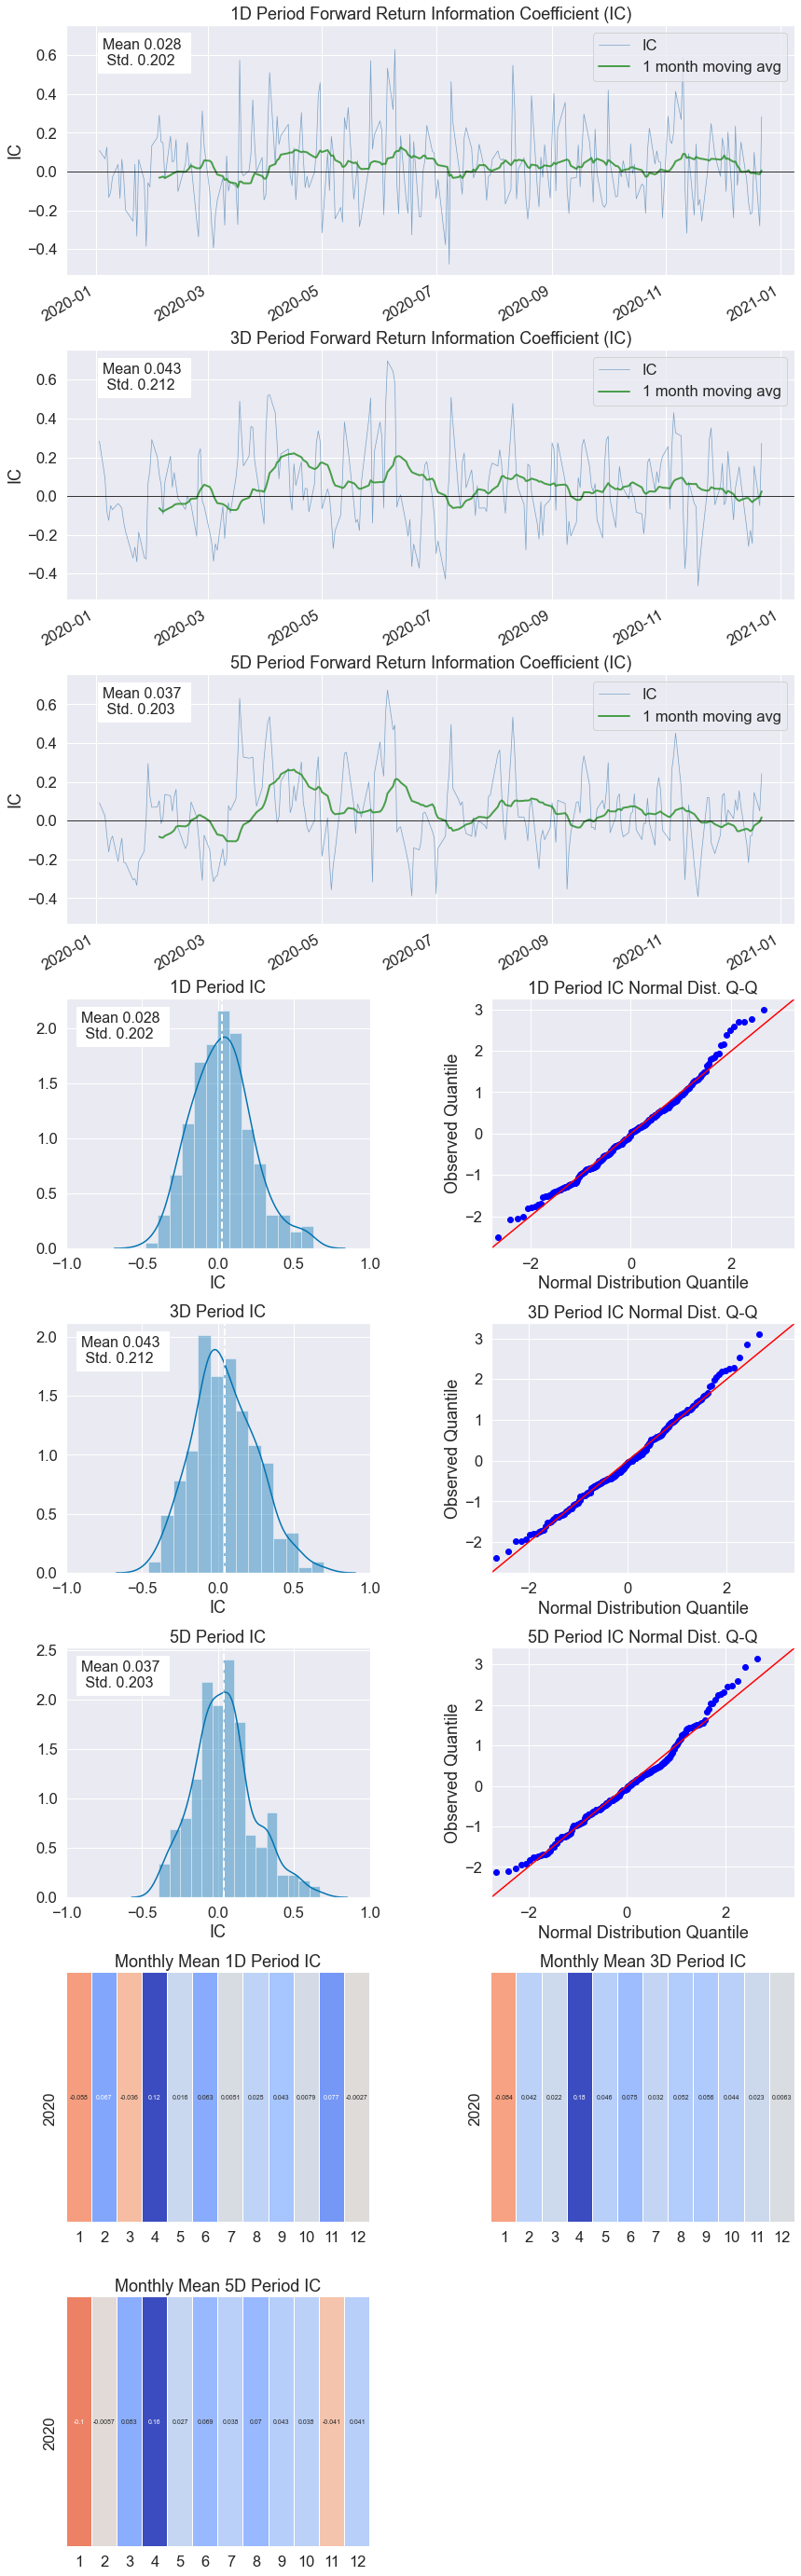

Turnover Analysis


,1D,3D,5D
Quantile 1 Mean Turnover,0.279,0.613,0.727
Quantile 2 Mean Turnover,0.543,0.756,0.787
Quantile 3 Mean Turnover,0.590,0.768,0.787
Quantile 4 Mean Turnover,0.541,0.753,0.784
Quantile 5 Mean Turnover,0.286,0.628,0.747


,1D,3D,5D
Mean Factor Rank Autocorrelation,0.839,0.327,0.087


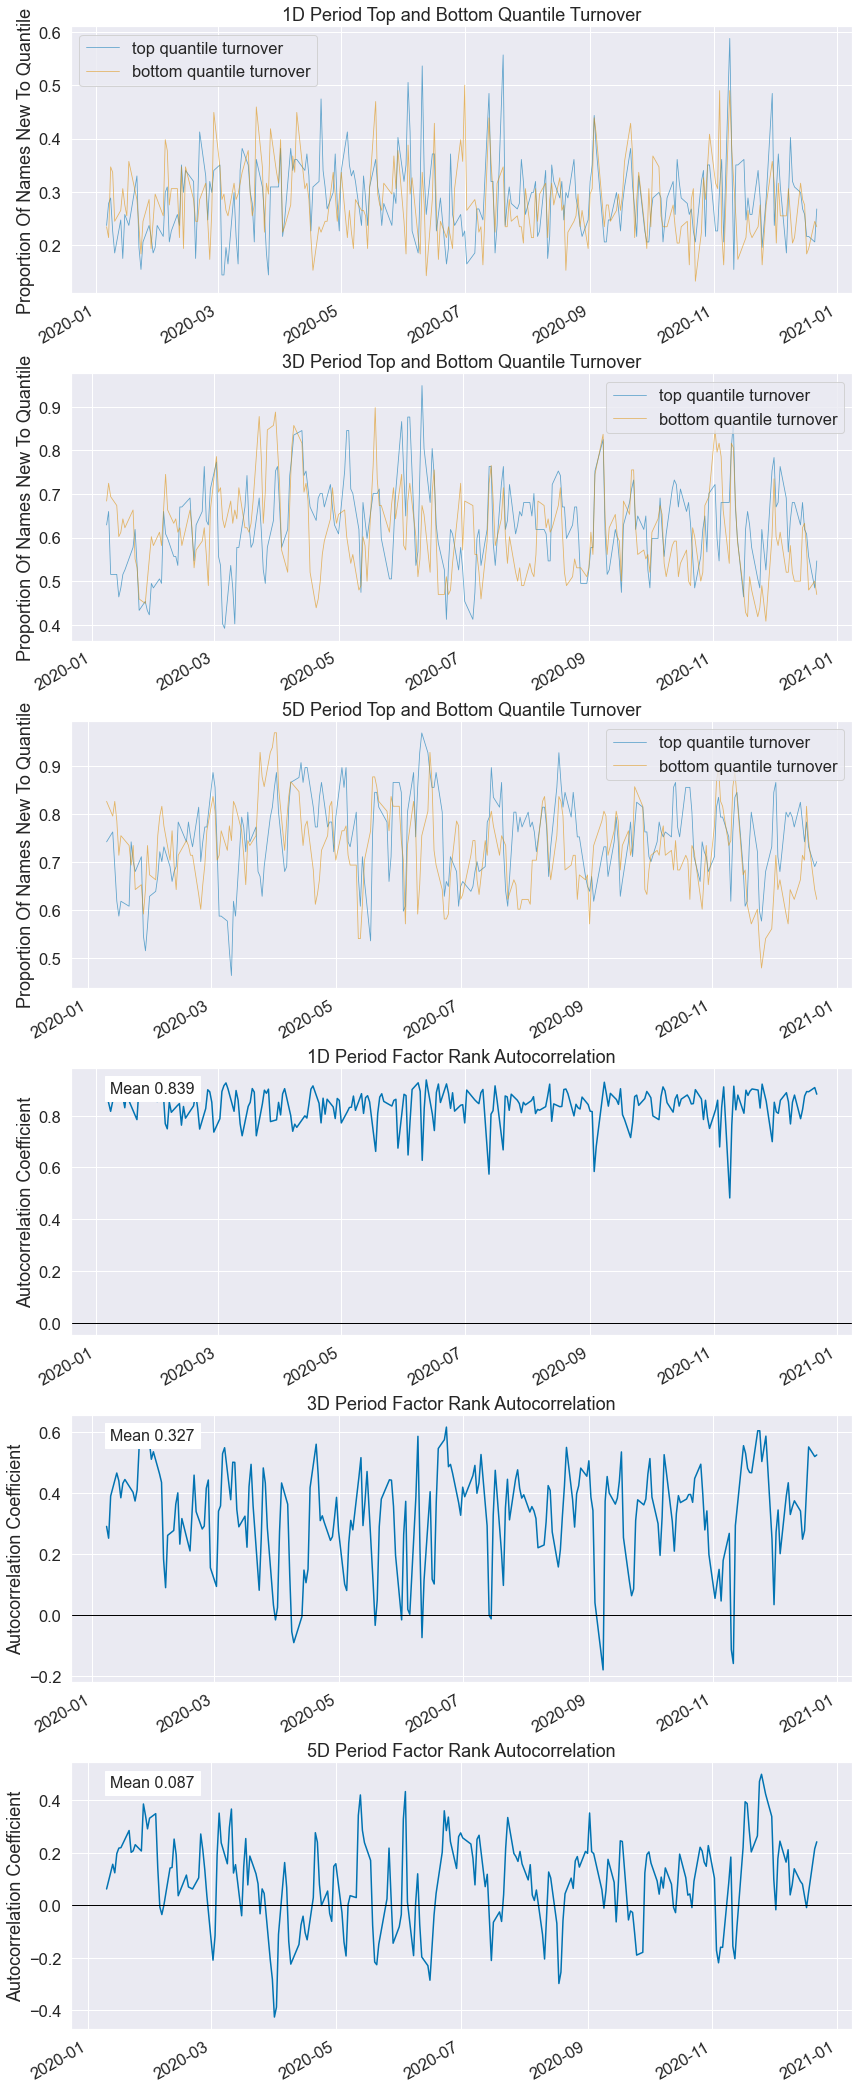

In [97]:
#Call the alphalens function 
alphalens.tears.create_full_tear_sheet(factor_data)